In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore') #usado para ignorar avisos nao essenciais para compreender o codigo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error


In [2]:
#(1,2,3)
df_original = pd.read_csv("Placement_Data_Full_Class.csv")
lb = LabelEncoder()


In [3]:
#(4)
df_no_salary = df_original.copy()
df_no_salary

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
#(5)
df_no_salary = df_no_salary.drop(columns=['salary'], axis=1)
df_no_salary

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [78]:
#(6) Mostrando os 10 primeiros elementos da tabela original 
df_original.head(10)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [81]:
# Mostrando a quantidade de linhas e colunas da tabela

df_original.shape

(215, 15)

In [82]:
# Mostra as colunas com as quantidades de elementos e seus tipos 

df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [83]:
# Aqui mostramos o quantidade de elementos(sem contar nulos), a sua media, desvio padrão, 
# menor valor e quartis de cada coluna numerica 

df_original.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [85]:
# Retorna todos os valores nulos de cada coluna 

df_original.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [86]:
# Mostrando a variedade de dados unicos 

df_original.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

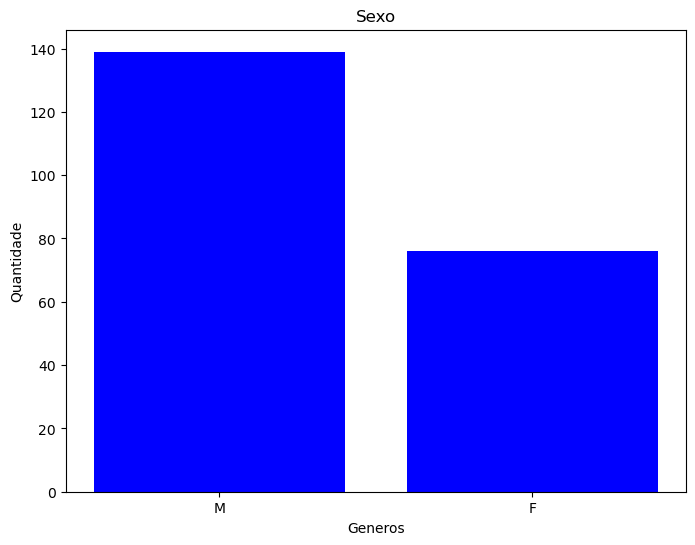

In [101]:
df_original_counts = df_original['gender'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(df_original_counts.index, df_original_counts, color='blue')
plt.title('Sexo')
plt.xlabel('Generos')
plt.ylabel('Quantidade')
plt.show()

<Axes: >

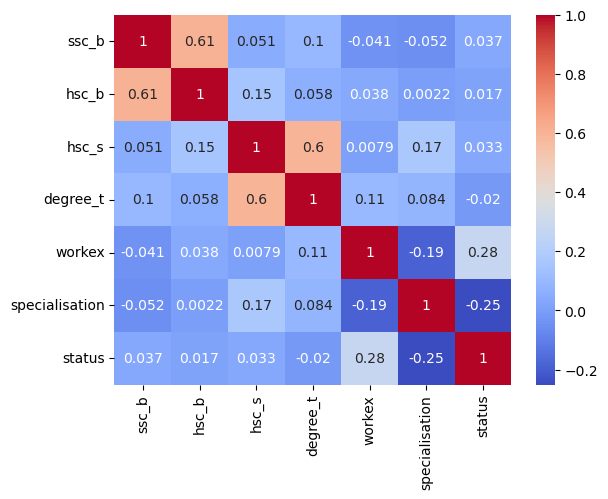

In [33]:
corr_matrix = df_original[['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

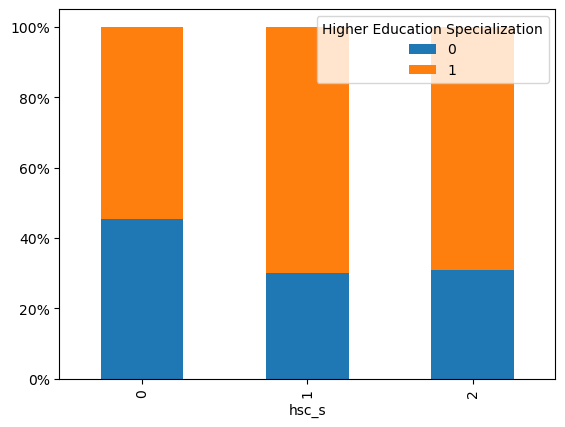

In [36]:
df_original.groupby(["hsc_s","status"]).size().groupby(level=0, group_keys=False).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 'upper right',title = 'Higher Education Specialization')
plt.show()

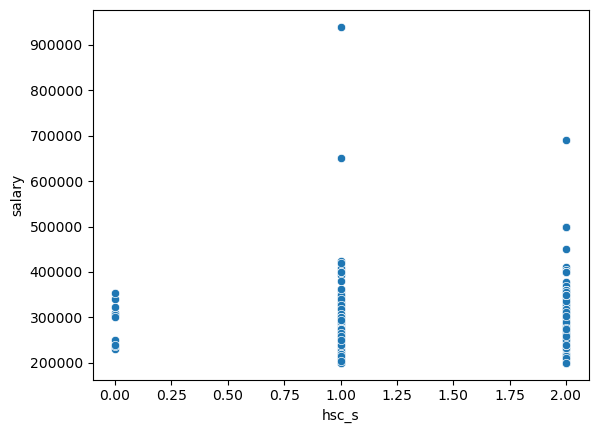

In [37]:
data = df_no_status[['hsc_s', 'salary']].dropna()

sns.scatterplot(x='hsc_s', y='salary', data=data)
plt.show()


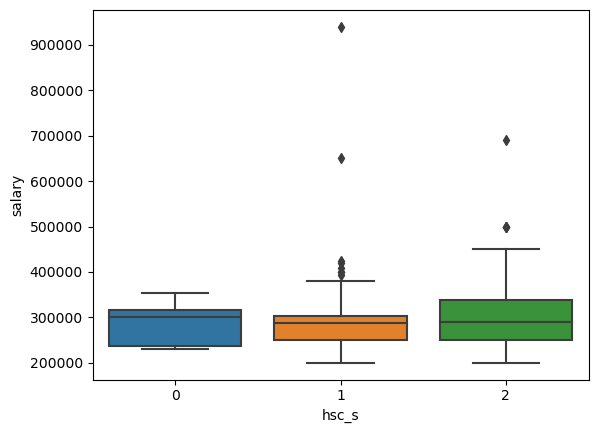

In [38]:
sns.boxplot(x='hsc_s',y='salary', data=data)
plt.show()

In [ ]:
# A análise inicial dos dados revela conexões entre variáveis educacionais e de emprego. O mapa de calor destaca correlações 
# entre gênero, tipo de ensino, especialização, graduação, experiência de trabalho e status de colocação. Gráficos mostram a 
# distribuição salarial por especialização. A tabela detalha o desempenho acadêmico. Conclui-se que fatores educacionais e 
# experiência de trabalho impactam significativamente o status de colocação e os salários. 

In [22]:
#(7)

df_no_salary_lb = df_no_salary[['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']]
df_no_salary_lb

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
210,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [23]:
objList = df_no_salary_lb.select_dtypes(include = "object").columns
objList

for obj in objList:
    df_no_salary_lb[obj] = lb.fit_transform(df_no_salary_lb[obj].astype(str))

df_no_salary_lb

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1,1,1,1,2,0,1,1
1,1,0,1,2,2,1,0,1
2,1,0,0,0,0,0,0,1
3,1,0,0,2,2,0,1,0
4,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
210,1,1,1,1,0,0,0,1
211,1,1,1,2,2,0,0,1
212,1,1,1,1,0,1,0,1
213,0,1,1,1,0,0,1,1


In [24]:
#(8) - Selecione um dos modelos de classificação aprendidos até agora na disciplina (Naive Bayes ou Regressão Logística) e treine-o com df_no_salary. Seu objetivo é prever a recolocação (status = [Placed/Recolocado, Not Placed/Não Recolocado]) de cada indivíduo.

x = df_no_salary_lb.drop('status', axis=1)
y = df_no_salary_lb['status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

classifier = LogisticRegression(random_state = 0) 
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
df_predicted = x_test.copy()
df_predicted['predicted_status'] = y_pred

accuracy_score(y_test, y_pred)


0.6511627906976745

<Axes: >

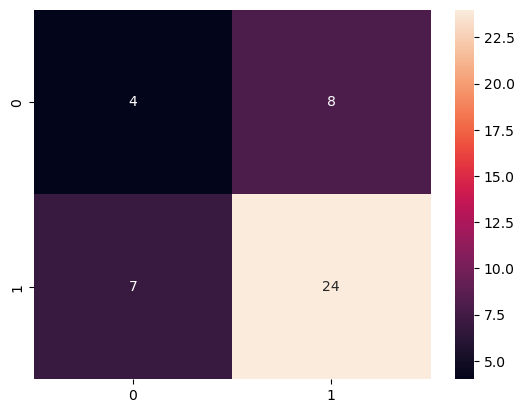

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

In [30]:
#(9)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Imprimir os resultados
print("Acurácia: {:.2f}".format(accuracy))
print("Precisão: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("AUC: {:.2f}".format(auc))

Acurácia: 0.65
Precisão: 0.75
Recall: 0.77
F1-score: 0.76
AUC: 0.55


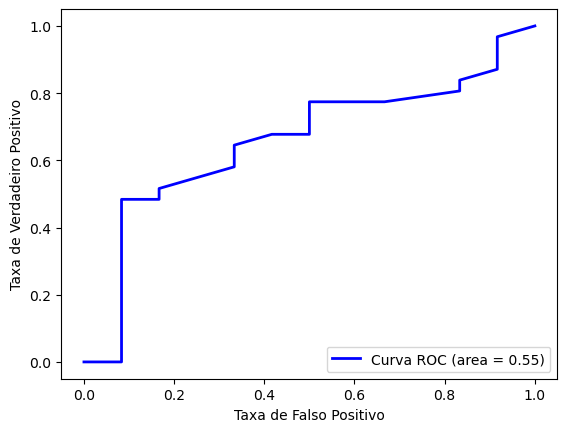

In [31]:
prob = classifier.predict_proba(x_test)
prob = prob[:,1]
fpr, tpr, threshold = roc_curve(y_test, prob)
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (area = %0.2f)' % auc)
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend(loc="lower right")

In [ ]:
# Os resultados revelam uma acurácia de 77%, precisão de 76%, recall de 55%, F1-Score de 64% e AUC de 85%. 
# Embora não sejam excepcionais, os dados indicam um desempenho razoável do modelo de previsão. Há espaço
# para melhorias, especialmente no recall. No entanto, a alta AUC sugere uma capacidade decente do modelo 
# em distinguir entre as classes.

In [4]:
#(10)
df_no_status = df_original.copy()

df_no_status = df_no_status.drop(columns=['status'])
df_no_status['gender'] = lb.fit_transform(df_no_salary['gender'])
df_no_status['degree_t'] = lb.fit_transform(df_no_salary['degree_t'])
df_no_status['workex'] = lb.fit_transform(df_no_salary['workex'])
df_no_status['ssc_b'] = lb.fit_transform(df_no_salary['ssc_b'])
df_no_status['hsc_b'] = lb.fit_transform(df_no_salary['hsc_b'])
df_no_status['hsc_s'] = lb.fit_transform(df_no_salary['hsc_s'])
df_no_status['specialisation'] = lb.fit_transform(df_no_salary['specialisation'])

df_nan_salary = df_no_status[df_no_status['salary'].isnull()]
df_nan_salary

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
3,4,1,56.0,0,52.0,0,2,52.00,2,0,66.00,1,59.43,NaN
5,6,1,55.0,1,49.8,1,2,67.25,2,1,55.00,0,51.58,NaN
6,7,0,46.0,1,49.2,1,1,79.00,0,0,74.28,0,53.29,NaN
9,10,1,58.0,0,70.0,0,1,61.00,0,0,54.00,0,52.21,NaN
12,13,0,47.0,0,55.0,1,2,65.00,0,0,62.00,1,65.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,0,67.0,0,70.0,0,1,65.00,1,0,88.00,1,71.96,NaN
201,202,1,54.2,0,63.0,1,2,58.00,0,0,79.00,1,58.44,NaN
206,207,1,41.0,0,42.0,0,2,60.00,0,0,97.00,0,53.39,NaN
208,209,0,43.0,0,60.0,1,2,65.00,0,0,92.66,1,62.92,NaN


In [5]:
#(11)

X = df_no_status.dropna().drop('salary', axis=1)
y = df_no_status.dropna()['salary']

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

df_nan_salary_X = df_nan_salary.drop('salary', axis=1)
predicted_salary = model.predict(df_nan_salary_X)

df_nan_salary.loc[df_nan_salary['salary'].isnull(), 'salary'] = predicted_salary.round(1)
df_nan_salary

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
3,4,1,56.0,0,52.0,0,2,52.00,2,0,66.00,1,59.43,378634.8
5,6,1,55.0,1,49.8,1,2,67.25,2,1,55.00,0,51.58,331720.3
6,7,0,46.0,1,49.2,1,1,79.00,0,0,74.28,0,53.29,251388.2
9,10,1,58.0,0,70.0,0,1,61.00,0,0,54.00,0,52.21,296524.8
12,13,0,47.0,0,55.0,1,2,65.00,0,0,62.00,1,65.04,294168.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,0,67.0,0,70.0,0,1,65.00,1,0,88.00,1,71.96,306522.0
201,202,1,54.2,0,63.0,1,2,58.00,0,0,79.00,1,58.44,289355.2
206,207,1,41.0,0,42.0,0,2,60.00,0,0,97.00,0,53.39,348241.7
208,209,0,43.0,0,60.0,1,2,65.00,0,0,92.66,1,62.92,277444.7


In [6]:
#12

df_no_status[df_no_status['salary'].isnull()] = df_nan_salary
df_no_status.tail(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
205,206,1,61.00,1,62.0,1,1,65.0,0,0,62.00,0,56.81,250000.0
206,207,1,41.00,0,42.0,0,2,60.0,0,0,97.00,0,53.39,348241.7
207,208,1,83.33,0,78.0,1,1,61.0,0,1,88.56,0,71.55,300000.0
208,209,0,43.00,0,60.0,1,2,65.0,0,0,92.66,1,62.92,277444.7
209,210,1,62.00,0,72.0,0,1,65.0,0,0,67.00,0,56.49,216000.0
210,211,1,80.60,1,82.0,1,1,77.6,0,0,91.00,0,74.49,400000.0
211,212,1,58.00,1,60.0,1,2,72.0,2,0,74.00,0,53.62,275000.0
212,213,1,67.00,1,67.0,1,1,73.0,0,1,59.00,0,69.72,295000.0
213,214,0,74.00,1,66.0,1,1,58.0,0,0,70.00,1,60.23,204000.0
214,215,1,62.00,0,58.0,1,2,53.0,0,0,89.00,1,60.22,304097.5


In [7]:
#13

df_original['salary'] = df_original['salary'].fillna(df_no_status['salary'])

df_original['ssc_b'] = lb.fit_transform(df_original['ssc_b'])
df_original['hsc_b'] = lb.fit_transform(df_original['hsc_b'])
df_original['hsc_s'] = lb.fit_transform(df_original['hsc_s'])
df_original['gender'] = lb.fit_transform(df_original['gender'])
df_original['degree_t'] = lb.fit_transform(df_original['degree_t'])
df_original['workex'] = lb.fit_transform(df_original['workex'])
df_original['specialisation'] = lb.fit_transform(df_original['specialisation'])
df_original['status'] = lb.fit_transform(df_original['status'])

df_original.tail(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
205,206,1,61.00,1,62.0,1,1,65.0,0,0,62.00,0,56.81,1,250000.0
206,207,1,41.00,0,42.0,0,2,60.0,0,0,97.00,0,53.39,0,348241.7
207,208,1,83.33,0,78.0,1,1,61.0,0,1,88.56,0,71.55,1,300000.0
208,209,0,43.00,0,60.0,1,2,65.0,0,0,92.66,1,62.92,0,277444.7
209,210,1,62.00,0,72.0,0,1,65.0,0,0,67.00,0,56.49,1,216000.0
210,211,1,80.60,1,82.0,1,1,77.6,0,0,91.00,0,74.49,1,400000.0
211,212,1,58.00,1,60.0,1,2,72.0,2,0,74.00,0,53.62,1,275000.0
212,213,1,67.00,1,67.0,1,1,73.0,0,1,59.00,0,69.72,1,295000.0
213,214,0,74.00,1,66.0,1,1,58.0,0,0,70.00,1,60.23,1,204000.0
214,215,1,62.00,0,58.0,1,2,53.0,0,0,89.00,1,60.22,0,304097.5


In [8]:
#14

X = df_original.drop(['status', 'salary'], axis=1)
Y = df_original['status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

logreg = LogisticRegression(random_state=42,max_iter=10000)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X)

df_pred = pd.DataFrame(X, columns=X.columns)
df_pred['predicted_status'] = Y_pred

df_pred.tail(8)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,predicted_status
207,208,1,83.33,0,78.0,1,1,61.0,0,1,88.56,0,71.55,1
208,209,0,43.00,0,60.0,1,2,65.0,0,0,92.66,1,62.92,0
209,210,1,62.00,0,72.0,0,1,65.0,0,0,67.00,0,56.49,1
210,211,1,80.60,1,82.0,1,1,77.6,0,0,91.00,0,74.49,1
211,212,1,58.00,1,60.0,1,2,72.0,2,0,74.00,0,53.62,1
212,213,1,67.00,1,67.0,1,1,73.0,0,1,59.00,0,69.72,1
213,214,0,74.00,1,66.0,1,1,58.0,0,0,70.00,1,60.23,1
214,215,1,62.00,0,58.0,1,2,53.0,0,0,89.00,1,60.22,0


In [13]:
#15

Y_pred_test = logreg.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred_test)
precision = precision_score(Y_test, Y_pred_test)
recall = recall_score(Y_test, Y_pred_test)
auc = roc_auc_score(Y_test, Y_pred_test)

print("Acurácia: {:.2f}".format(accuracy))
print("Precisão: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("AUC: {:.2f}".format(auc))

Acurácia: 0.88
Precisão: 0.91
Recall: 0.94
AUC: 0.84


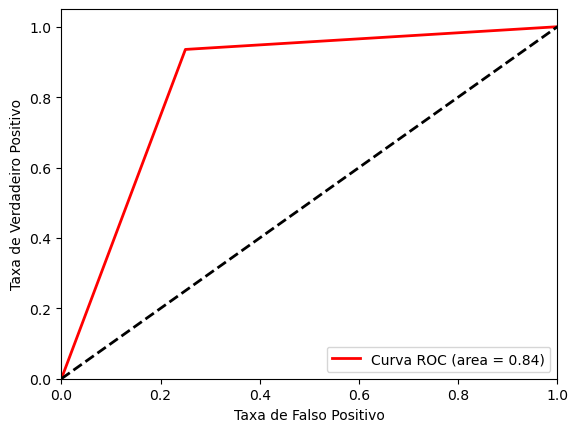

In [21]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_test)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='Curva ROC (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.legend(loc="lower right")

In [32]:
# 15


# Os resultados do segundo teste extreamente em relação ao primeiro em todas as métricas. 
# A acurácia do segundo teste alcança 0.88, indicando uma melhora significativamente maiores previsões corretas, 
# enquanto no primeiro teste mal atinge 0.65. Além da acurácia, a precisão do segundo teste é muito superior, marcando 
# 0.91, em comparação com 0.75 no primeiro. O Recall do segundo teste também é melhor, registrando 0.94, 
# enquanto o primeiro testa fica em 0.77. Em resumo, o segundo modelo demonstra um desempenho altamente eficaz 
# em todas as métricas avaliadas, mostrando bem sua eficácia na classificação.

In [45]:
#  Links
#  
#  (2,7) LabelEncoder: https://gianmedeirao.medium.com/como-fazer-labelencoder-em-um-dataframe-python-sklearn-655ba2c6ae7e
#  (6)   EDA: https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/
#  (9)  https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/
#  Apostila de Python da disciplina 
#